## Pyber Challenge:
#### There are two parts for the challenge: 
##### 1) Creating a summary table of the total rides, total, drivers, total fare, average fare per ride and average dare per driver by city type.
##### 2) Creating a line graph of the weekly fares by city type. 

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

### Importing Needed Libraries

In [2]:
# Libraries needed
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics 
import scipy.stats as sts

### Loading and Reading data files needed for the analysis

In [3]:
#Load the city and ride data
city_data_to_load = "/Users/hebamaly/PyBer-Analysis/Resources/city_data.csv"
ride_data_to_load = "/Users/hebamaly/PyBer-Analysis/Resources/ride_data.csv"

In [4]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


### Cleaning up data before merging the two dataframes

In [6]:
# Get the columns and the rows that are not null.
city_data_df.count()


city            120
driver_count    120
type            120
dtype: int64

In [7]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city.
#city_data_df["type"].unique()
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [10]:
# Get the number of data points from the Suburban cities.
sum(city_data_df["type"]=="Suburban")

36

In [11]:
# Get the number of data points from the Rural cities.
sum(city_data_df["type"]=="Rural")

18

In [12]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
# Get the data types of each column.
ride_data_df.dtypes


city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [14]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"]).drop_duplicates()


In [15]:
pyber_data_df = pyber_data_df.drop_duplicates()

In [16]:
# Display the DataFrame
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Part 1: Creating Summary Table by City Type

### Calculating Total Fares by City Type

In [17]:
# Part 1 
#Calculate the total fares by city type
pyber_groupbycitytype=pyber_data_df.groupby('type')
pyber_groupbycitytype_fare=pyber_groupbycitytype['fare'].sum()


### Calculating Total Drivers by City Type

In [18]:
# Calculate the total driver by citytype
total_driver_citytype = city_data_df.groupby(['type'])['driver_count'].sum()

### Calculating Total Rides by City Type

In [19]:
#Calculate the total rides by city type
pyber_groupbycitytype_ride=pyber_groupbycitytype['ride_id'].count()

## Creating a Table for the Total Rides, Drivers, and Fares
### Adding Total Rides to the New Dataframe

In [20]:
# Add the total rides series into the pybergroupcitytype_total dataframe
pyber_groupbycitytype_total = pd.DataFrame(pyber_groupbycitytype_ride)
pyber_groupbycitytype_total


,ride_id
type,
Rural,125
Suburban,625
Urban,1625


### Adding Total Drivers and Fares to the Created Table

In [21]:
# Add total drivers and fares to the summary table
pyber_groupbycitytype_total['Total Drivers'] =  total_driver_citytype
pyber_groupbycitytype_total['Total Fare'] =  pyber_groupbycitytype_fare

In [22]:
pyber_groupbycitytype_total

,ride_id,Total Drivers,Total Fare
type,,,
Rural,125,78,4327.93
Suburban,625,490,19356.33
Urban,1625,2405,39854.38


### Calculating Average Fare per Ride

In [23]:
# Calculate the average fare per ride
Avg_fare_per_ride = pyber_groupbycitytype_total['Total Fare'] / pyber_groupbycitytype_total['ride_id']
Avg_fare_per_ride


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

### Calculating Average Fare per Driver

In [24]:
# Calculate the average fare per driver
Avg_fare_per_driver = pyber_groupbycitytype_total['Total Fare'] / pyber_groupbycitytype_total['Total Drivers']
Avg_fare_per_driver


type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

### Adding Average Fare per Rides and Drivers to the Created Table

In [25]:
# Add Average fare per driver and ride as columns in the summary table
pyber_groupbycitytype_total['Average Fare per Ride'] =  Avg_fare_per_ride
pyber_groupbycitytype_total['Average Fare per Driver'] =  Avg_fare_per_driver
pyber_groupbycitytype_total


,ride_id,Total Drivers,Total Fare,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


### Formatting and Renaming Columns in Summary Table

In [26]:
# Formatting average fare per rider
pyber_groupbycitytype_total['Average Fare per Ride'] = pyber_groupbycitytype_total['Average Fare per Ride'].map("${:,.2f}".format)

In [27]:
# Formatting average fare per driver
pyber_groupbycitytype_total['Average Fare per Driver'] = pyber_groupbycitytype_total['Average Fare per Driver'].map("${:,.2f}".format)

In [28]:
# Fromatting total fare
pyber_groupbycitytype_total['Total Fare'] = pyber_groupbycitytype_total['Total Fare'].map("${:,.2f}".format)

In [29]:
#Rename the summary table column name
pyber_groupbycitytype_total = pyber_groupbycitytype_total.rename(columns={"ride_id":"Total Rides"})


In [30]:
# Delete Index name
del pyber_groupbycitytype_total.index.name

### Summary Table by City Type

In [31]:
# Summary Table by City Type
pyber_groupbycitytype_total


,Total Rides,Total Drivers,Total Fare,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


### Findings and Analysis:
##### The summary table above shows the more urban the city is the more rides, drivers and fares it has.  As it is seen, rural city types has the least number of rides and drivers, while urban city type has the most number of rides and drivers.  This is expected since urban cities are more populated cities. As a result, the total fare for urban cities is the highest, since you have more number of rides and drivers.  At the sametime the average fare per driver and ride for urban cities is lower than other city types since you have more competition (i.e. more people giving the service).  On the otherhand, the total cities have the highest average fares since there is less competition (i.e less number of drivers) and so the price of the service goes up since you have limited resource.


## Part 2: Plotting Weekly Fare by City Type

### Rename and Setting index Columns in Merged Dataframe 

In [32]:
# Part 2
# Rename column in the merged Dataframe
pyber_data_df = pyber_data_df.rename(columns={'city': 'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})


In [33]:
# Set index to Date
pyber_data_df_new = pyber_data_df.set_index('Date')

### Copying part of the dataframe 

In [34]:
# Copy The dataframe and create a fare dataframe
pyber_data_fare_df = pyber_data_df_new[['City Type', 'Fare']].copy()
#pyber_data_fare_df = pyber_data_df[['Date', 'City Type', 'Fare']].copy()

 ### Fare by City type and Date

In [35]:
pyber_data_fare_df

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
...,...,...
2019-04-29 17:04:39,Rural,13.38
2019-01-30 00:05:47,Rural,20.76
2019-02-10 21:03:50,Rural,11.11


In [36]:
# Set index datetime data type
pyber_data_fare_df.index = pyber_data_fare_df.index.astype('datetime64[ns]')


In [37]:
# Make sure the index data type is date time
pyber_data_fare_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
City Type    2375 non-null object
Fare         2375 non-null float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [38]:
# Show the fare table
pyber_data_fare_df


,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
...,...,...
2019-04-29 17:04:39,Rural,13.38
2019-01-30 00:05:47,Rural,20.76
2019-02-10 21:03:50,Rural,11.11


### Total Fare by City Type and Date

In [39]:
#Calculate the sum of fares by the type of city and date 
pyber_groupby_city_date_fare = pyber_data_fare_df.groupby(['Date','City Type'])['Fare'].sum()

In [40]:
pyber_groupby_city_date_fare

Date                 City Type
2019-01-01 00:08:16  Urban        37.91
2019-01-01 00:46:46  Suburban     47.74
2019-01-01 02:07:24  Suburban     24.07
2019-01-01 03:46:50  Urban         7.57
2019-01-01 05:23:21  Urban        10.75
                                  ...  
2019-05-08 04:20:00  Urban        21.99
2019-05-08 04:39:49  Urban        18.45
2019-05-08 07:29:01  Urban        18.55
2019-05-08 11:38:35  Urban        19.77
2019-05-08 13:10:18  Urban        18.04
Name: Fare, Length: 2375, dtype: float64

In [41]:
# Create a dataframe with the sum of fares by city type and date
pyber_groupby_city_date_fare_df = pd.DataFrame(pyber_groupby_city_date_fare)
pyber_groupby_city_date_fare_df


,,Fare
Date,City Type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:49,Urban,18.45
2019-05-08 07:29:01,Urban,18.55


In [42]:
#Reset index
pyber_groupby_city_date_fare_df_new = pyber_groupby_city_date_fare_df.reset_index()


### Create Pivot Table from the Above Table

In [43]:
#Create a pivot table from the previous dataframe
pyber_pivottable_1 = pd.pivot_table(pyber_groupby_city_date_fare_df_new, values ='Fare', index=['Date'], columns = ['City Type'])

### Choosing given dates to create a new dataframe

In [44]:
# Creating dataframe with given dates from the pivot table created above
pyber_pivottable_1_df = pyber_pivottable_1.loc['2019-01-01':'2019-04-28']

In [45]:
pyber_pivottable_1_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


### Make sure index datatype of above table is a datetime

In [46]:
pyber_pivottable_1_df.index = pyber_pivottable_1_df.index.astype('datetime64[ns]')

### Creating weekly bins  

In [47]:
# Create Weekly bins
weekly_df = pyber_pivottable_1_df.resample('W').sum()

### Weekly Fare Table by City Type

In [48]:
# Weekly Fare by City type Table
weekly_df


City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


### Plotting the above table 

In [49]:
# Fivethirtyeight Graph
plt.style.use('fivethirtyeight')

### Total Fare By City Type Graph

<Figure size 720x864 with 0 Axes>

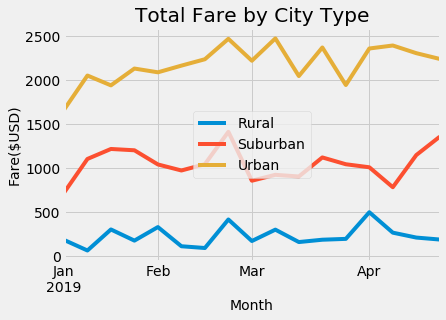

In [50]:
#Create the plot 
plt.figure(figsize=(10, 12))
weekly_df.plot()
#Set up titles, x and y axise labels
plt.title("Total Fare by City Type")
plt.ylabel('Fare($USD)',fontsize=14)
plt.xlabel("Month",fontsize=14)
# Create Legend and Setup it location
plt.legend(loc='center')
#Save and Show plot
plt.savefig("Challenge_figures/Fig_challenge.png")
plt.show()


### Findings
##### As shown in the graph above, urban cities has the highest weekly total fares from January to end of April compared to other citiy types, while rural cities has the lowest weekly total fares from January through April.  The urban city total fare peaks in the last week of February and first week of March, while it drops in the last week of March. It seems that the total fare for all city types peaks in the last week of February.  In rural cities, the total fare also peaks in the first week of April while it drops significantly for suburban cities.  Also in the last weeks of April, the total fare seems to decrease for both the urban and rural cities, while it increases significantly for the suburban cities.